# 使用FP-growth算法来高效发现频繁项集

## FP-growth算法的基本工作流程

### 分为两步。

#### 1. 构建FP树。
需要对原始数据集扫描两遍，第一遍对所有元素项的出现次数进行计数，第二遍只考虑那些频繁元素。

#### 2.挖掘频繁项集。

#### 与Apriori相比：
FP-growth算法只需要对数据库进行两次扫描，而Apriori算法对于每个潜在的频繁项集都会扫描数据集判定给定模式是否频繁，因此FP-growth算法的速度要比Apriori算法更快。

## 创建FP树的数据结构

### FP-tree class definition

In [1]:
class treeNode:
	def __init__(self, nameValue, numOccur, parentNode):
		self.name = nameValue#node name
		self.count = numOccur#count of nodes
		self.nodeLink = None #link similar items
		self.parent = parentNode#refer to parent of the node
		self.children = {}#children of the node

	def inc(self,numOccur):
		self.count += numOccur#increments the count

	def disp(self, ind = 1):
		print('  ' * ind, self.name, ' ', self.count)
		for child in self.children.values():#for debugging
			#ind += 1
			child.disp(ind + 1)
			#print("count:%d" % (ind+1))


In [2]:
rootNode = treeNode('pyramid',9,None)
rootNode.disp()

   pyramid   9


In [3]:
rootNode.children['eye'] = treeNode('eye',13,None)
rootNode.children['phoenix'] = treeNode('phoenix',3,None)
rootNode.children['phoe'] = treeNode('phoe',23,None)
rootNode.disp()

   pyramid   9
     eye   13
     phoenix   3
     phoe   23


## 构建FP树

### 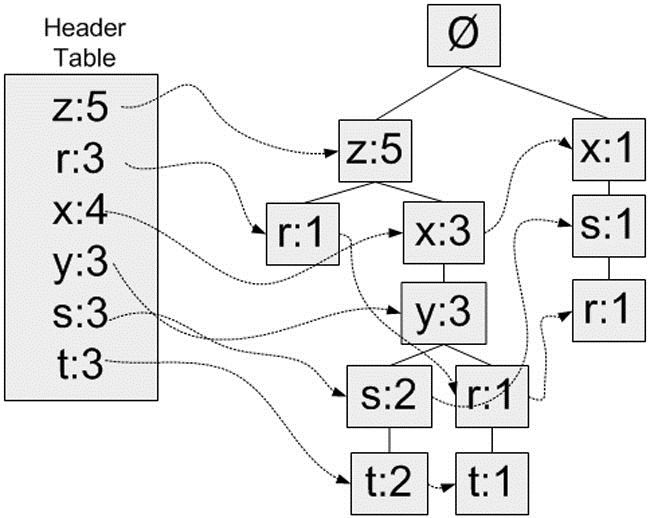

头指针示意图

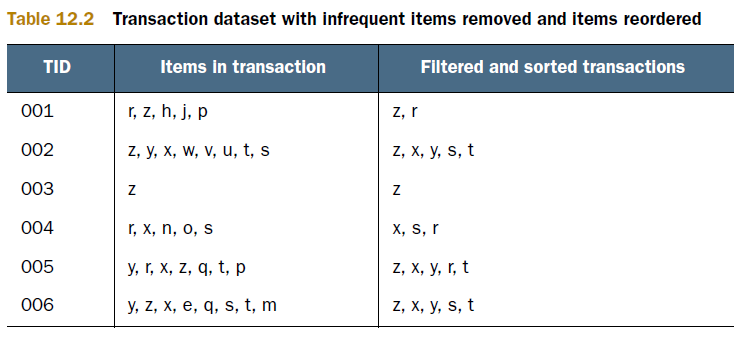

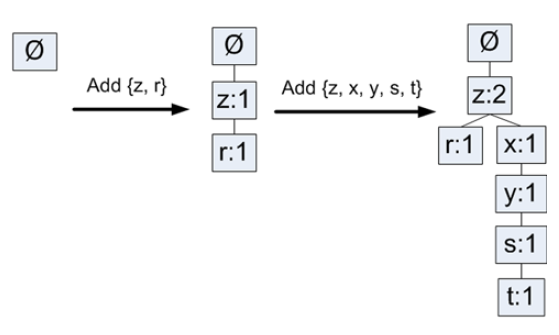

使用table12-2的数据构建FP树的前两步

### FP-tree creation code

In [4]:
#FP-tree
def createTree(dataSet, minSup = 1):
	headerTable = {}
	for trans in dataSet:
		for item in trans:
			headerTable[item] = headerTable.get(item, 0) + dataSet[trans]

	for k in list(headerTable.keys()):#remove items not meeting min support
		if headerTable[k] < minSup:
			del(headerTable[k])

	freqItemSet = set(headerTable.keys())
	if len(freqItemSet) == 0:#if no items meet min support,exit
		return None,None
	for k in headerTable:
		headerTable[k] = [headerTable[k], None]
	retTree = treeNode('Null Set', 1, None)
	for tranSet, count in dataSet.items():
		localD = {}
		for item in tranSet:#sort transactions by global frequency
			if item in freqItemSet:
				localD[item] = headerTable[item][0]
		if len(localD) > 0:
			orderedItems = [v[0] for v in sorted(localD.items(),key = lambda p:p[1], reverse = True)]
			updateTree(orderedItems, retTree, headerTable,count)#populate tree with ordered freq itemset
	return retTree, headerTable

def updateTree(items, inTree, headerTable, count):
	if items[0] in inTree.children:#exist
		inTree.children[items[0]].inc(count)
	else:#doesn't exist, create a new treeNode and adds it as a child
		inTree.children[items[0]] = treeNode(items[0], count, inTree)
		if headerTable[items[0]][1] == None:
			headerTable[items[0]][1] = inTree.children[items[0]]
		else:
			updateHeader(headerTable[items[0]][1], inTree.children[items[0]])
	if len(items) > 1:#recursively call updateTree on remaining items
		updateTree(items[1::],inTree.children[items[0]],headerTable,count)

def updateHeader(nodeToTest, targetNode):#nodeLink, linked list
	while(nodeToTest.nodeLink != None):
		nodeToTest = nodeToTest.nodeLink
	nodeToTest.nodeLink = targetNode


### Simple Dataset and Wrapper

In [5]:
def loadSimpDat():
	simpDat = [['r','z','h','j','p'],
				['z','y','x','w','v','u','t','s'],
				['z'],
				['r','x','n','o','s'],
				['y','r','x','z','q','t','p'],
				['y','z','x','e','q','s','t','m']]
	return simpDat

def createInitSet(dataSet):
	retDict = {}
	for trans in dataSet:
		retDict[frozenset(trans)] = 1
	return retDict

In [6]:
simpDat = loadSimpDat()
simpDat

[['r', 'z', 'h', 'j', 'p'],
 ['z', 'y', 'x', 'w', 'v', 'u', 't', 's'],
 ['z'],
 ['r', 'x', 'n', 'o', 's'],
 ['y', 'r', 'x', 'z', 'q', 't', 'p'],
 ['y', 'z', 'x', 'e', 'q', 's', 't', 'm']]

In [7]:
initSet = createInitSet(simpDat)
initSet

{frozenset({'h', 'j', 'p', 'r', 'z'}): 1,
 frozenset({'s', 't', 'u', 'v', 'w', 'x', 'y', 'z'}): 1,
 frozenset({'z'}): 1,
 frozenset({'n', 'o', 'r', 's', 'x'}): 1,
 frozenset({'p', 'q', 'r', 't', 'x', 'y', 'z'}): 1,
 frozenset({'e', 'm', 'q', 's', 't', 'x', 'y', 'z'}): 1}

In [8]:
myFPtree, myHeaderTab = createTree(initSet,3)
myFPtree.disp()

   Null Set   1
     z   5
       r   1
       x   3
         s   2
           t   1
             y   1
           y   1
             t   1
         y   1
           t   1
             r   1
     x   1
       s   1
         r   1
